# Exploring Relationships

### 1. Import libraries and data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Create inline

%matplotlib inline

In [3]:
#Import data
df_qb = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_QB.csv', encoding='latin1')
df_rb = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_RB.csv', encoding='latin1')
df_wr = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_WR.csv', encoding='latin1')
df_te = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_TE.csv', encoding='latin1')

### 2. Exploring relationships

#### QB

In [4]:
#Change directory
os.chdir('C:\\Users\\User\\Fantasy Football Score Ranges\\04 Analysis\\QB')

In [5]:
#View columns
df_qb.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'CMP', 'PASS ATT',
       'PCT', 'PASS YDS', 'Y/A', 'PASS TD', 'INT', 'SACKS', 'RUSH ATT',
       'RUSH YDS', 'RUSH TD', 'FL', 'G', 'FPTS'],
      dtype='object')

In [ ]:
#Define columns
YEAR: NFL season
WEEK: Week of NFL season
Rank: Rank by fantasy points scored by position by week
Player: Player name
CMP: Number of pass completions
PASS ATT: Number of pass attempts
PCT: Completion percentage (CMP/PASS ATT)
PASS YDS: Number of passing yards (a player scores 1 fantasy point per 25 passing yards)
Y/A: Yards per attempt (PASS YDS/PASS ATT)
PASS TD: Number of passing touchdowns (a player scores 4 fantasy points per passing touchdowns)
INT: Number of interceptions (a player scores -2 fantasy points per interception)
SACKS: Number of sacks
RUSH ATT: Number of rush attempts 
RUSH YDS: Number of rushing yards (a player receivers 1 fantasy point per 10 rushing yards)
RUSH TD: Number of rushing touchdowns (a player scores 6 fantasy points per rushing touchdowns)
FL: Fumbles lost (a player scores -2 fantasy points per fumble)
G: Games played
FPTS: Fantasy points

In [6]:
#Create subset with variables to explore
sub_qb = df_qb[['FPTS', 'PASS YDS', 'PASS TD', 'INT', 'RUSH YDS', 'RUSH TD']]

In [7]:
#View subset
sub_qb

,FPTS,PASS YDS,PASS TD,INT,RUSH YDS,RUSH TD
0,34.9,360.0,5.0,0.0,5.0,0
1,31.5,297.0,3.0,2.0,56.0,1
2,25.7,313.0,4.0,2.0,12.0,0
3,24.7,243.0,0.0,0.0,90.0,1
4,23.3,279.0,3.0,0.0,1.0,0
...,...,...,...,...,...,...
1263,9.8,34.0,0.0,0.0,24.0,1
1264,8.6,197.0,1.0,1.0,7.0,0
1265,8.9,94.0,1.0,0.0,11.0,0
1266,8.0,285.0,0.0,0.0,6.0,0


In [8]:
#Create correlation matrix
sub_qb.corr()

,FPTS,PASS YDS,PASS TD,INT,RUSH YDS,RUSH TD
FPTS,1.000000,0.644084,0.755920,-0.286972,0.326193,0.371164
PASS YDS,0.644084,1.000000,0.495374,0.033465,-0.088427,-0.022612
PASS TD,0.755920,0.495374,1.000000,-0.117104,-0.049575,-0.132381
INT,-0.286972,0.033465,-0.117104,1.000000,0.014627,-0.050561
RUSH YDS,0.326193,-0.088427,-0.049575,0.014627,1.000000,0.328581
RUSH TD,0.371164,-0.022612,-0.132381,-0.050561,0.328581,1.000000


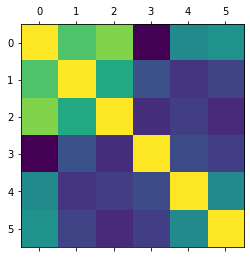

In [9]:
#Create correlation heatmap
plt.matshow(sub_qb.corr())
plt.show()

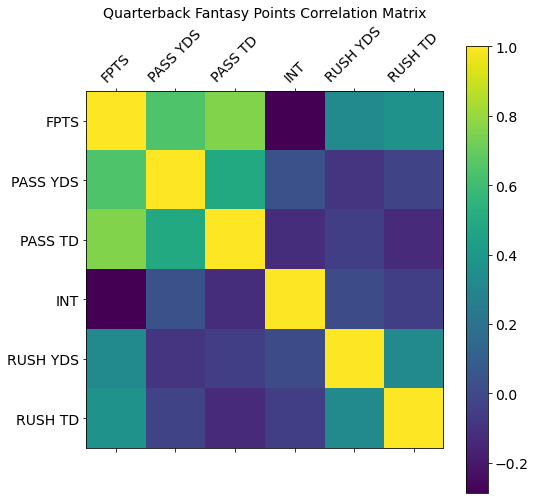

In [10]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_qb.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_qb.shape[1]), sub_qb.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_qb.shape[1]), sub_qb.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Quarterback Fantasy Points Correlation Matrix', fontsize=14) # add title
plt.savefig("QB Correlation Heatmap.png")

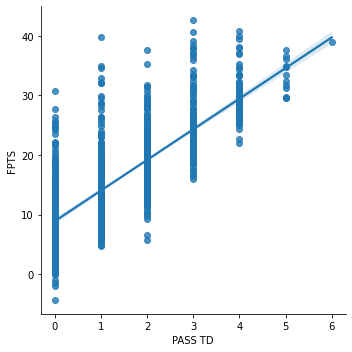

In [11]:
#Create scatterplot for Fantasy Points and Passing Touchdowns
sns.lmplot(x = 'PASS TD', y = 'FPTS', data = sub_qb)
plt.savefig("Fantasy Points and Passing Touchdowns Scatterplot.png")

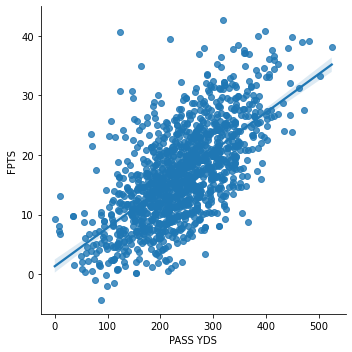

In [12]:
#Create scatterplot for Fantasy Points and Passing Yards
sns.lmplot(x = 'PASS YDS', y = 'FPTS', data = sub_qb)
plt.savefig("Fantasy Points and Passing Yards Scatterplot.png")

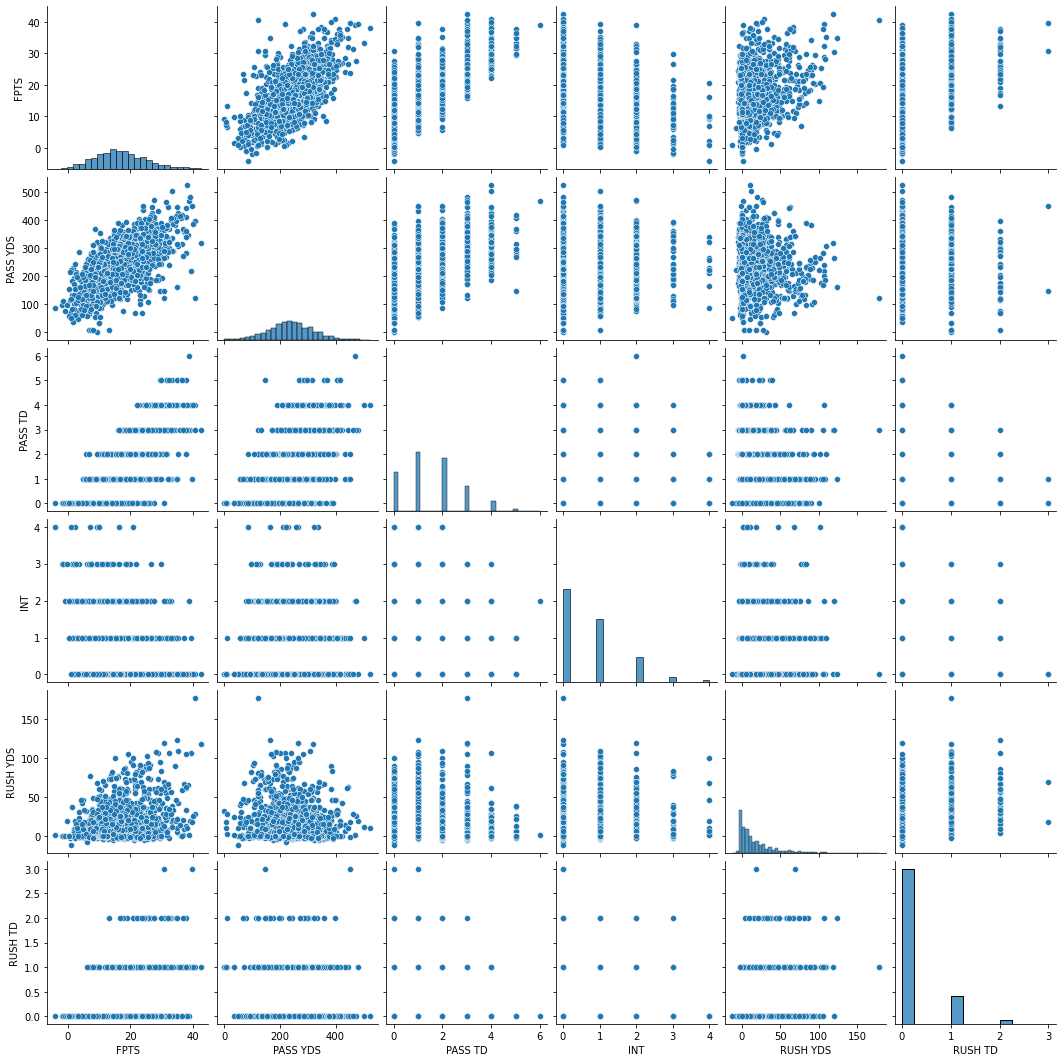

In [13]:
#Create pair plot
g = sns.pairplot(sub_qb)
plt.savefig("QB Pair Plot.png")

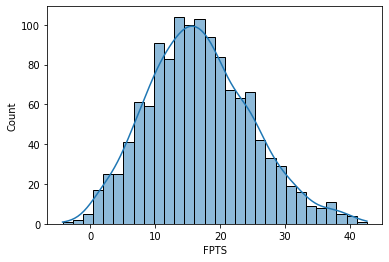

In [14]:
#Create histogram to visualize distribution of fantasy points
sns.histplot(sub_qb['FPTS'], bins = 30, kde = True)
plt.savefig("QB Fantasy Points Histogram.png")

In [15]:
#Create quarterback fantasy scoring categories
df_qb.loc[df_qb['FPTS'] < 14, 'QB Points Category'] = 'QB Poor'
df_qb.loc[(df_qb['FPTS'] >= 14) & (df_qb['FPTS'] < 22), 'QB Points Category'] = 'QB Average'
df_qb.loc[df_qb['FPTS'] > 22, 'QB Points Category'] = 'QB Good'
df_qb['QB Points Category'].value_counts(dropna = False)

QB Poor       477
QB Average    475
QB Good       314
NaN             2
Name: QB Points Category, dtype: int64

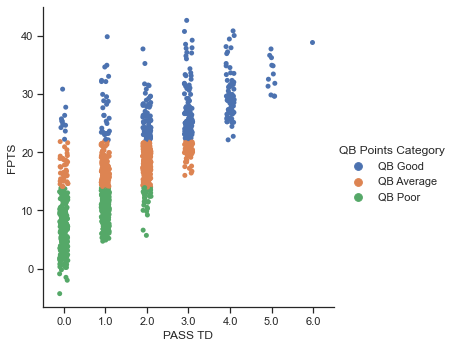

In [16]:
#Create categorical plot using scoring categories created above
sns.set(style="ticks")
g = sns.catplot(x="PASS TD", y="FPTS", hue="QB Points Category", data=df_qb)
plt.savefig("QB Categorical Plot.png")

#### RB

In [17]:
#Change directory
os.chdir('C:\\Users\\User\\Fantasy Football Score Ranges\\04 Analysis\\RB')

In [18]:
#View columns
df_rb.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'ATT', 'RUSH YDS',
       'Y/A', 'LG', '20+', 'RUSH TD', 'REC', 'TGT', 'REC YDS', 'Y/R', 'REC TD',
       'FL', 'G', 'Zero PPR', 'Half PPR', 'One PPR', 'Unnamed: 20'],
      dtype='object')

In [ ]:
#Define columns
YEAR: NFL season
WEEK: Week of NFL season
Rank: Rank by fantasy points scored by position by week
Player: Player name
ATT: Number of rush attempts 
RUSH YDS: Number of rushing yards (a player receivers 1 fantasy point per 10 rushing yards)
Y/A: Yards per attempt (RUSH YDS/ATT)
LG: Longest rush
20+: Rushes of 20+ yards
RUSH TD: Number of rushing touchdowns (a player scores 6 fantasy points per rushing touchdowns)
REC: Receptions (a player scores 0 points per reception in Zero PPR, a player scores 0.5 points per reception in Half PPR, and a player scores 1 points per reception in One PPR)
TGT: Number of passing targets
REC YDS: Number of receiving yards (a player scores 1 fantasy point per 10 receiving yards)
Y/R: Yards per reception (REC YDS/REC)
REC TD: Number of receiving touchdowns (a player scores 6 fantasy points per receiving touchdowns)
FL: Fumbles lost (a player scores -2 fantasy points per fumble)
G: Games played
Zero PPR: Number of fantasy point scored in Zero PPR
Half PPR: Number of fantasy point scored in Half PPR
One PPR: Number of fantasy point scored in One PPR
#The various PPR styles represent different fantasy scoring styles that value receptions at varying amounts -- half PPR is the most popular

In [19]:
#Create subset with variables to explore
sub_rb = df_rb[['Half PPR', 'RUSH YDS', 'RUSH TD', 'FL', 'REC', 'REC YDS', 'REC TD']]

In [20]:
#View subset
sub_rb

,Half PPR,RUSH YDS,RUSH TD,FL,REC,REC YDS,REC TD
0,28.9,51,0,0,10,128,1
1,38.2,58,0,0,13,117,2
2,3.0,32,0,0,1,-7,0
3,1.2,13,0,0,1,-6,0
4,2.9,30,0,0,1,-6,0
...,...,...,...,...,...,...,...
2396,24.9,43,0,0,9,101,1
2397,21.2,40,0,0,14,102,0
2398,18.8,27,0,0,11,106,0
2399,30.4,53,1,0,3,116,1


In [21]:
#Create correlation matrix
sub_rb.corr()

,Half PPR,RUSH YDS,RUSH TD,FL,REC,REC YDS,REC TD
Half PPR,1.000000,0.697282,0.746899,0.014112,0.473692,0.507006,0.392953
RUSH YDS,0.697282,1.000000,0.421238,0.074824,0.123232,0.095466,0.060681
RUSH TD,0.746899,0.421238,1.000000,0.037083,0.064305,0.083624,0.022694
FL,0.014112,0.074824,0.037083,1.000000,0.072119,0.041481,-0.015152
REC,0.473692,0.123232,0.064305,0.072119,1.000000,0.827780,0.290342
REC YDS,0.507006,0.095466,0.083624,0.041481,0.827780,1.000000,0.338813
REC TD,0.392953,0.060681,0.022694,-0.015152,0.290342,0.338813,1.000000


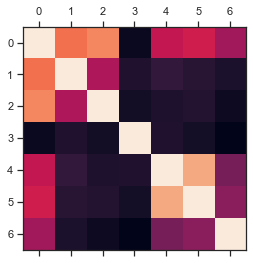

In [22]:
#Create correlation heatmap
plt.matshow(sub_rb.corr())
plt.show()

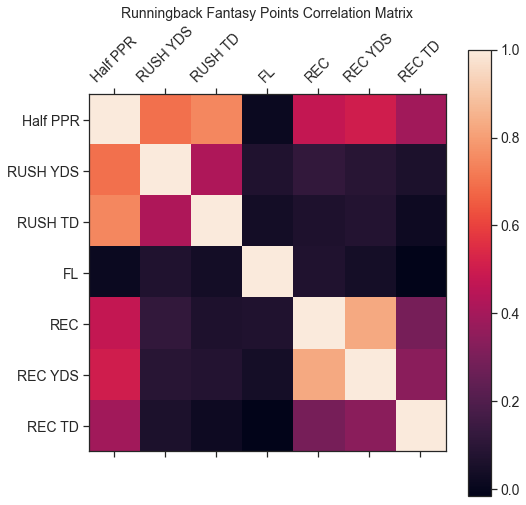

In [23]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_rb.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_rb.shape[1]), sub_rb.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_rb.shape[1]), sub_rb.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Runningback Fantasy Points Correlation Matrix', fontsize=14) # add title
plt.savefig("RB Correlation Heatmap.png")

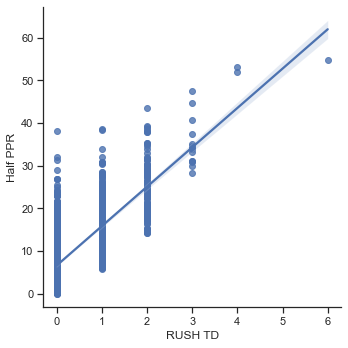

In [24]:
#Create scatterplot for Fantasy Points and Rushing Touchdowns
sns.lmplot(x = 'RUSH TD', y = 'Half PPR', data = sub_rb)
plt.savefig("Fantasy Points and Rushing Touchdowns Scatterplot.png")

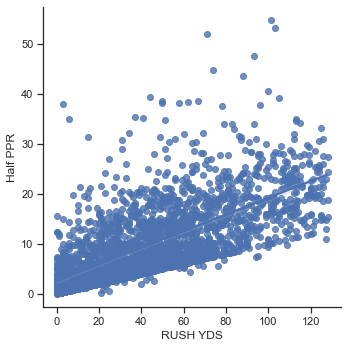

In [25]:
#Create scatterplot for Fantasy Points and Rushing Yards
sns.lmplot(x = 'RUSH YDS', y = 'Half PPR', data = sub_rb)
plt.savefig("Fantasy Points and Rushing Yards Scatterplot.png")

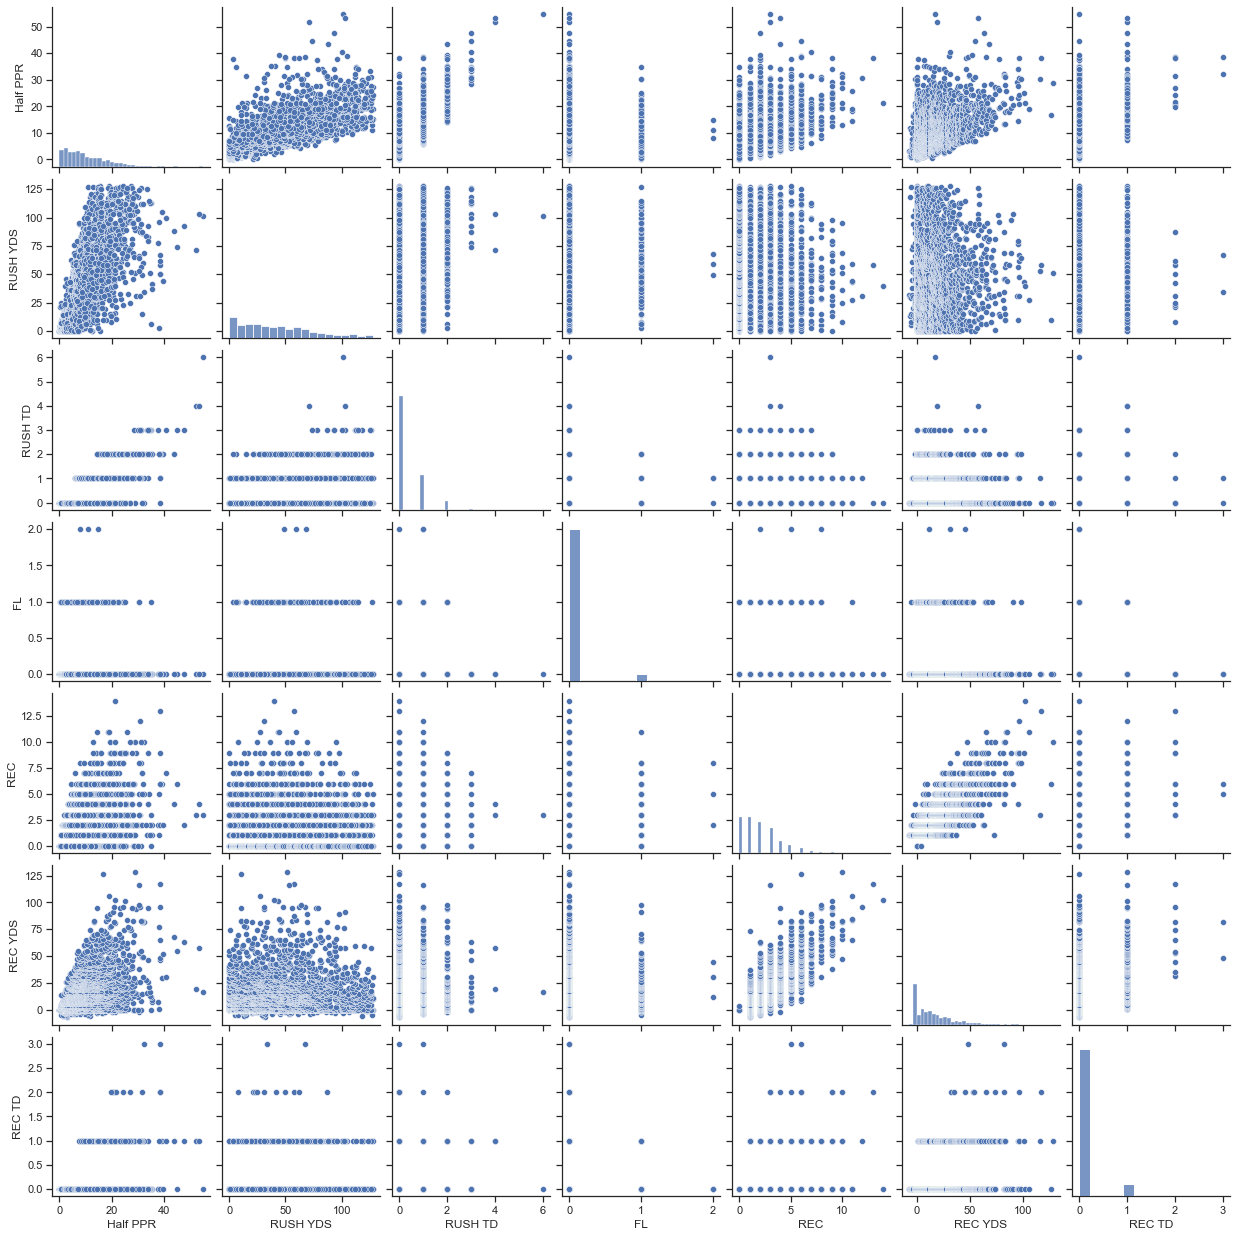

In [26]:
#Create pair plot
g = sns.pairplot(sub_rb)
plt.savefig("RB Pair Plot.png")

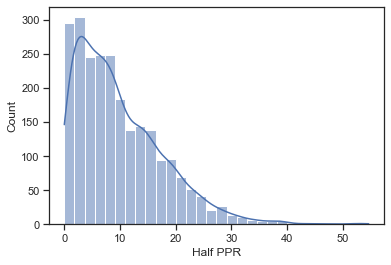

In [27]:
#Create histogram to visualize distribution of fantasy points
sns.histplot(sub_rb['Half PPR'], bins = 30, kde = True)
plt.savefig("RB Fantasy Points Histogram.png")

In [28]:
#Create runningback fantasy scoring categories
df_rb.loc[df_rb['Half PPR'] < 8, 'RB Points Category'] = 'RB Poor'
df_rb.loc[(df_rb['Half PPR'] >= 8) & (df_rb['Half PPR'] < 14), 'RB Points Category'] = 'RB Average'
df_rb.loc[df_rb['Half PPR'] > 14, 'RB Points Category'] = 'RB Good'
df_rb['RB Points Category'].value_counts(dropna = False)

RB Poor       1196
RB Good        632
RB Average     563
NaN             10
Name: RB Points Category, dtype: int64

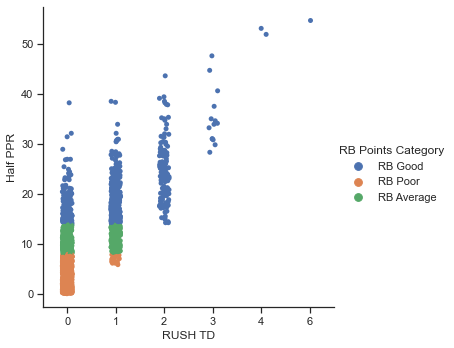

In [29]:
#Create categorical plot using scoring categories created above
sns.set(style="ticks")
g = sns.catplot(x="RUSH TD", y="Half PPR", hue="RB Points Category", data=df_rb)
plt.savefig("RB Categorical Plot.png")

#### WR

In [30]:
#Change directory
os.chdir('C:\\Users\\User\\Fantasy Football Score Ranges\\04 Analysis\\WR')

In [31]:
#View columns
df_wr.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'REC', 'TGT', 'REC YDS',
       'Y/R', 'LG', '20+', 'REC TD', 'ATT', 'RUSH YDS', 'RUSH TD', 'FL', 'G',
       'Zero PPR', 'Half PPR', 'One PPR'],
      dtype='object')

In [ ]:
#Define columns
YEAR: NFL season
WEEK: Week of NFL season
Rank: Rank by fantasy points scored by position by week
Player: Player name
REC: Receptions (a player scores 0 points per reception in Zero PPR, a player scores 0.5 points per reception in Half PPR, and a player scores 1 points per reception in One PPR)
TGT: Number of passing targets
REC YDS: Number of receiving yards (a player scores 1 fantasy point per 10 receiving yards)
Y/R: Yards per reception (REC YDS/REC)
LG: Longest reception
20+: Receptions of 20+ yards
REC TD: Number of receiving touchdowns (a player scores 6 fantasy points per receiving touchdowns)
ATT: Number of rush attempts 
RUSH YDS: Number of rushing yards (a player receivers 1 fantasy point per 10 rushing yards)
RUSH TD: Number of rushing touchdowns (a player scores 6 fantasy points per rushing touchdowns)
FL: Fumbles lost (a player scores -2 fantasy points per fumble)
G: Games played
Zero PPR: Number of fantasy point scored in Zero PPR
Half PPR: Number of fantasy point scored in Half PPR
One PPR: Number of fantasy point scored in One PPR
#The various PPR styles represent different fantasy scoring styles that value receptions at varying amounts -- half PPR is the most popular

In [32]:
#Create subset with variables to explore
sub_wr = df_wr[['Half PPR', 'REC', 'REC YDS', 'REC TD', 'FL', 'RUSH YDS', 'RUSH TD']]

In [33]:
#View subset
sub_wr

,Half PPR,REC,REC YDS,REC TD,FL,RUSH YDS,RUSH TD
0,34.9,9,184,2,0,0,0
1,25.1,10,141,1,0,0,0
2,23.9,10,129,1,0,0,0
3,25.3,13,128,1,0,0,0
4,22.2,8,122,1,0,0,0
...,...,...,...,...,...,...,...
3321,1.6,1,7,0,0,4,0
3322,1.1,1,6,0,0,0,0
3323,1.1,1,6,0,0,0,0
3324,1.5,2,25,0,1,0,0


In [34]:
#Create correlation matrix
sub_wr.corr()

,Half PPR,REC,REC YDS,REC TD,FL,RUSH YDS,RUSH TD
Half PPR,1.000000,0.755007,0.874869,0.771967,0.008246,0.113252,0.137629
REC,0.755007,1.000000,0.784774,0.335691,0.093395,-0.008155,-0.012341
REC YDS,0.874869,0.784774,1.000000,0.422961,0.063429,-0.009916,-0.008123
REC TD,0.771967,0.335691,0.422961,1.000000,0.002362,-0.012270,0.011947
FL,0.008246,0.093395,0.063429,0.002362,1.000000,0.020482,0.012561
RUSH YDS,0.113252,-0.008155,-0.009916,-0.012270,0.020482,1.000000,0.451998
RUSH TD,0.137629,-0.012341,-0.008123,0.011947,0.012561,0.451998,1.000000


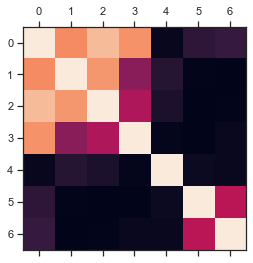

In [35]:
#Create correlation heatmap
plt.matshow(sub_wr.corr())
plt.show()

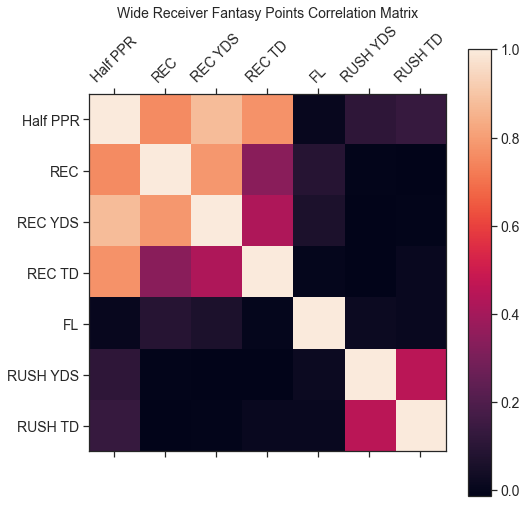

In [36]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_wr.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_wr.shape[1]), sub_wr.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_wr.shape[1]), sub_wr.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Wide Receiver Fantasy Points Correlation Matrix', fontsize=14) # add title
plt.savefig("WR Correlation Heatmap.png")

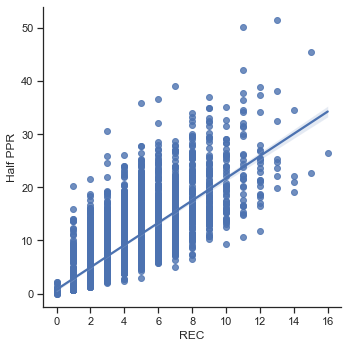

In [37]:
#Create scatterplot for Fantasy Points and Receptions
sns.lmplot(x = 'REC', y = 'Half PPR', data = sub_wr)
plt.savefig("Fantasy Points and Receptions Scatterplot.png")

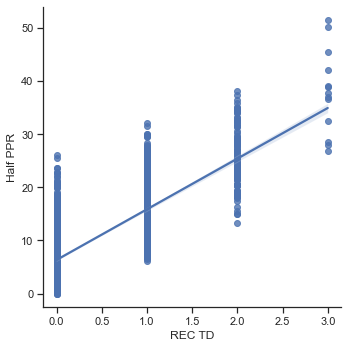

In [38]:
#Create scatterplot for Fantasy Points and Receiving Touchdowns
sns.lmplot(x = 'REC TD', y = 'Half PPR', data = sub_wr)
plt.savefig("Fantasy Points and Receiving Touchdowns Scatterplot.png")

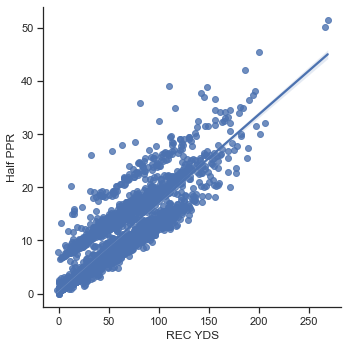

In [39]:
#Create scatterplot for Fantasy Points and Receiving Yards
sns.lmplot(x = 'REC YDS', y = 'Half PPR', data = sub_wr)
plt.savefig("Fantasy Points and Receiving Yards Scatterplot.png")

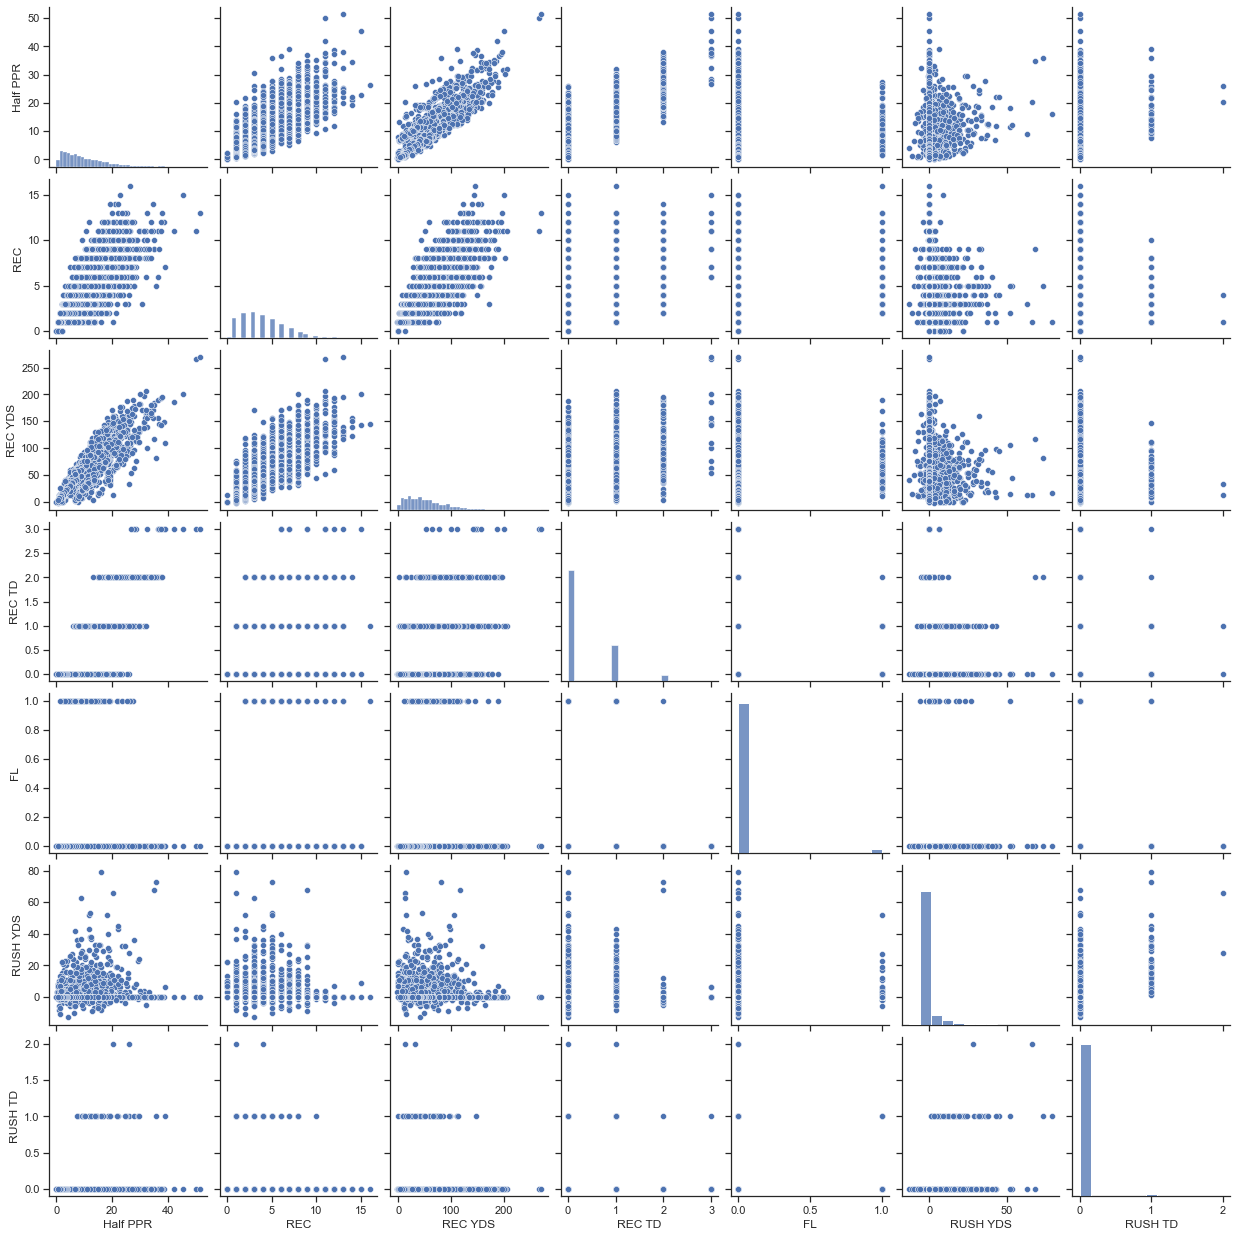

In [40]:
#Create pair plot
g = sns.pairplot(sub_wr)
plt.savefig("WR Pair Plot.png")

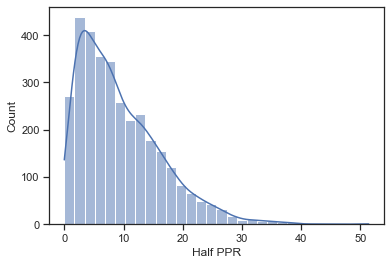

In [41]:
#Create histogram to visualize distribution of fantasy points
sns.histplot(sub_wr['Half PPR'], bins = 30, kde = True)
plt.savefig("WR Fantasy Points Histogram.png")

In [42]:
#Create wide receiver fantasy scoring categories
df_wr.loc[df_wr['Half PPR'] < 8, 'WR Points Category'] = 'WR Poor'
df_wr.loc[(df_wr['Half PPR'] >= 8) & (df_wr['Half PPR'] < 14), 'WR Points Category'] = 'WR Average'
df_wr.loc[df_wr['Half PPR'] > 14, 'WR Points Category'] = 'WR Good'
df_wr['WR Points Category'].value_counts(dropna = False)

WR Poor       1691
WR Average     870
WR Good        749
NaN             16
Name: WR Points Category, dtype: int64

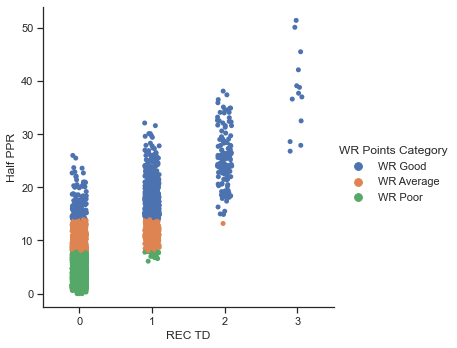

In [43]:
#Create categorical plot using scoring categories created above
sns.set(style="ticks")
g = sns.catplot(x="REC TD", y="Half PPR", hue="WR Points Category", data=df_wr)
plt.savefig("WR TD Categorical Plot.png")

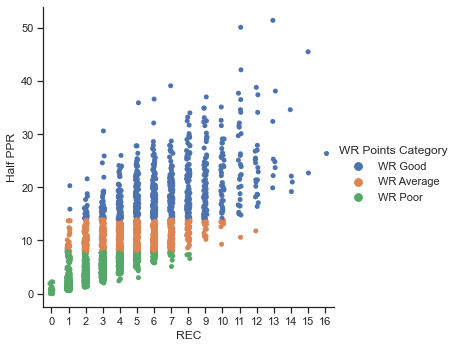

In [44]:
#Create categorical plot using scoring categories created above
sns.set(style="ticks")
g = sns.catplot(x="REC", y="Half PPR", hue="WR Points Category", data=df_wr)
plt.savefig("WR REC Categorical Plot.png")

#### TE

In [45]:
#Change directory
os.chdir('C:\\Users\\User\\Fantasy Football Score Ranges\\04 Analysis\\TE')

In [46]:
#View columns
df_te.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'REC', 'TGT', 'REC YDS',
       'Y/R', 'LG', '20+', 'REC TD', 'ATT', 'RUSH YDS', 'RUSH TD', 'FL', 'G',
       'Zero PPR', 'Half PPR', 'One PPR'],
      dtype='object')

In [ ]:
#Define columns
YEAR: NFL season
WEEK: Week of NFL season
Rank: Rank by fantasy points scored by position by week
Player: Player name
REC: Receptions (a player scores 0 points per reception in Zero PPR, a player scores 0.5 points per reception in Half PPR, and a player scores 1 points per reception in One PPR)
TGT: Number of passing targets
REC YDS: Number of receiving yards (a player scores 1 fantasy point per 10 receiving yards)
Y/R: Yards per reception (REC YDS/REC)
LG: Longest reception
20+: Receptions of 20+ yards
REC TD: Number of receiving touchdowns (a player scores 6 fantasy points per receiving touchdowns)
ATT: Number of rush attempts 
RUSH YDS: Number of rushing yards (a player receivers 1 fantasy point per 10 rushing yards)
RUSH TD: Number of rushing touchdowns (a player scores 6 fantasy points per rushing touchdowns)
FL: Fumbles lost (a player scores -2 fantasy points per fumble)
G: Games played
Zero PPR: Number of fantasy point scored in Zero PPR
Half PPR: Number of fantasy point scored in Half PPR
One PPR: Number of fantasy point scored in One PPR
#The various PPR styles represent different fantasy scoring styles that value receptions at varying amounts -- half PPR is the most popular

In [47]:
#Create subset with variables to explore
sub_te = df_te[['Half PPR','TGT', 'REC', 'REC YDS', 'REC TD', 'FL', 'RUSH YDS', 'RUSH TD']]

In [48]:
#View subset
sub_te

,Half PPR,TGT,REC,REC YDS,REC TD,FL,RUSH YDS,RUSH TD
0,0.4,2,0,0,0,0,4,0
1,0.0,0,0,0,0,0,0,0
2,0.5,0,0,0,0,0,5,0
3,0.4,2,0,0,0,0,4,0
4,0.6,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1353,15.9,10,8,119,0,0,0,0
1354,22.1,9,8,121,1,0,0,0
1355,15.8,9,7,123,0,0,0,0
1356,22.5,10,8,125,1,0,0,0


In [49]:
#Create correlation matrix
sub_te.corr()

,Half PPR,TGT,REC,REC YDS,REC TD,FL,RUSH YDS,RUSH TD
Half PPR,1.000000,0.618163,0.737269,0.792410,0.761775,0.008592,0.039225,0.030622
TGT,0.618163,1.000000,0.868624,0.710906,0.165930,0.053707,-0.009329,-0.034598
REC,0.737269,0.868624,1.000000,0.814845,0.237896,0.074154,-0.002970,-0.043666
REC YDS,0.792410,0.710906,0.814845,1.000000,0.234784,0.064235,0.007876,-0.035764
REC TD,0.761775,0.165930,0.237896,0.234784,1.000000,0.019294,0.000207,-0.034127
FL,0.008592,0.053707,0.074154,0.064235,0.019294,1.000000,-0.028061,0.070048
RUSH YDS,0.039225,-0.009329,-0.002970,0.007876,0.000207,-0.028061,1.000000,0.201244
RUSH TD,0.030622,-0.034598,-0.043666,-0.035764,-0.034127,0.070048,0.201244,1.000000


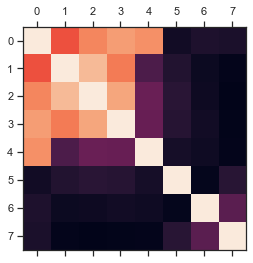

In [50]:
#Create correlation heatmap
plt.matshow(sub_te.corr())
plt.show()

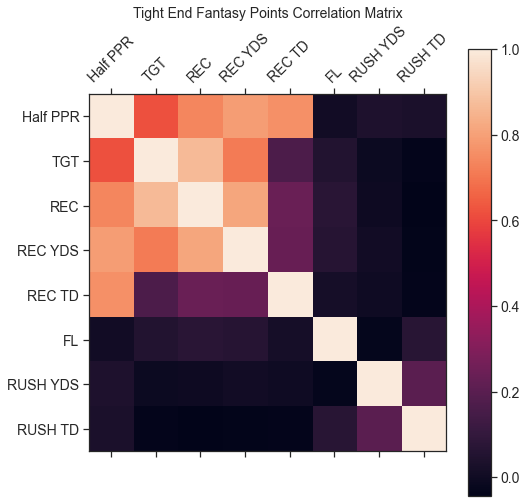

In [51]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_te.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_te.shape[1]), sub_te.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_te.shape[1]), sub_te.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Tight End Fantasy Points Correlation Matrix', fontsize=14) # add title
plt.savefig("TE Correlation Heatmap.png")

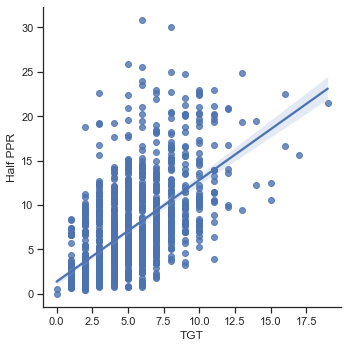

In [52]:
#Create scatterplot for Fantasy Points and Targets
sns.lmplot(x = 'TGT', y = 'Half PPR', data = sub_te)
plt.savefig("Fantasy Points and Targets Scatterplot.png")

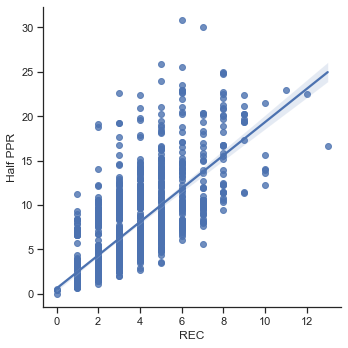

In [53]:
#Create scatterplot for Fantasy Points and Receptions
sns.lmplot(x = 'REC', y = 'Half PPR', data = sub_te)
plt.savefig("Fantasy Points and Receptions Scatterplot.png")

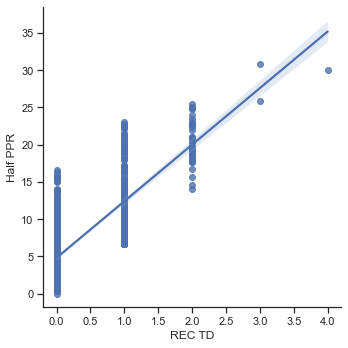

In [54]:
#Create scatterplot for Fantasy Points and Receiving Touchdowns
sns.lmplot(x = 'REC TD', y = 'Half PPR', data = sub_te)
plt.savefig("Fantasy Points and Receiving Touchdowns Scatterplot.png")

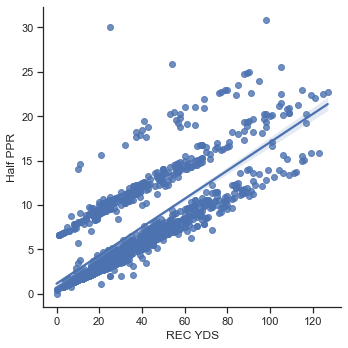

In [55]:
#Create scatterplot for Fantasy Points and Receiving Yards
sns.lmplot(x = 'REC YDS', y = 'Half PPR', data = sub_te)
plt.savefig("Fantasy Points and Receiving Yards Scatterplot.png")

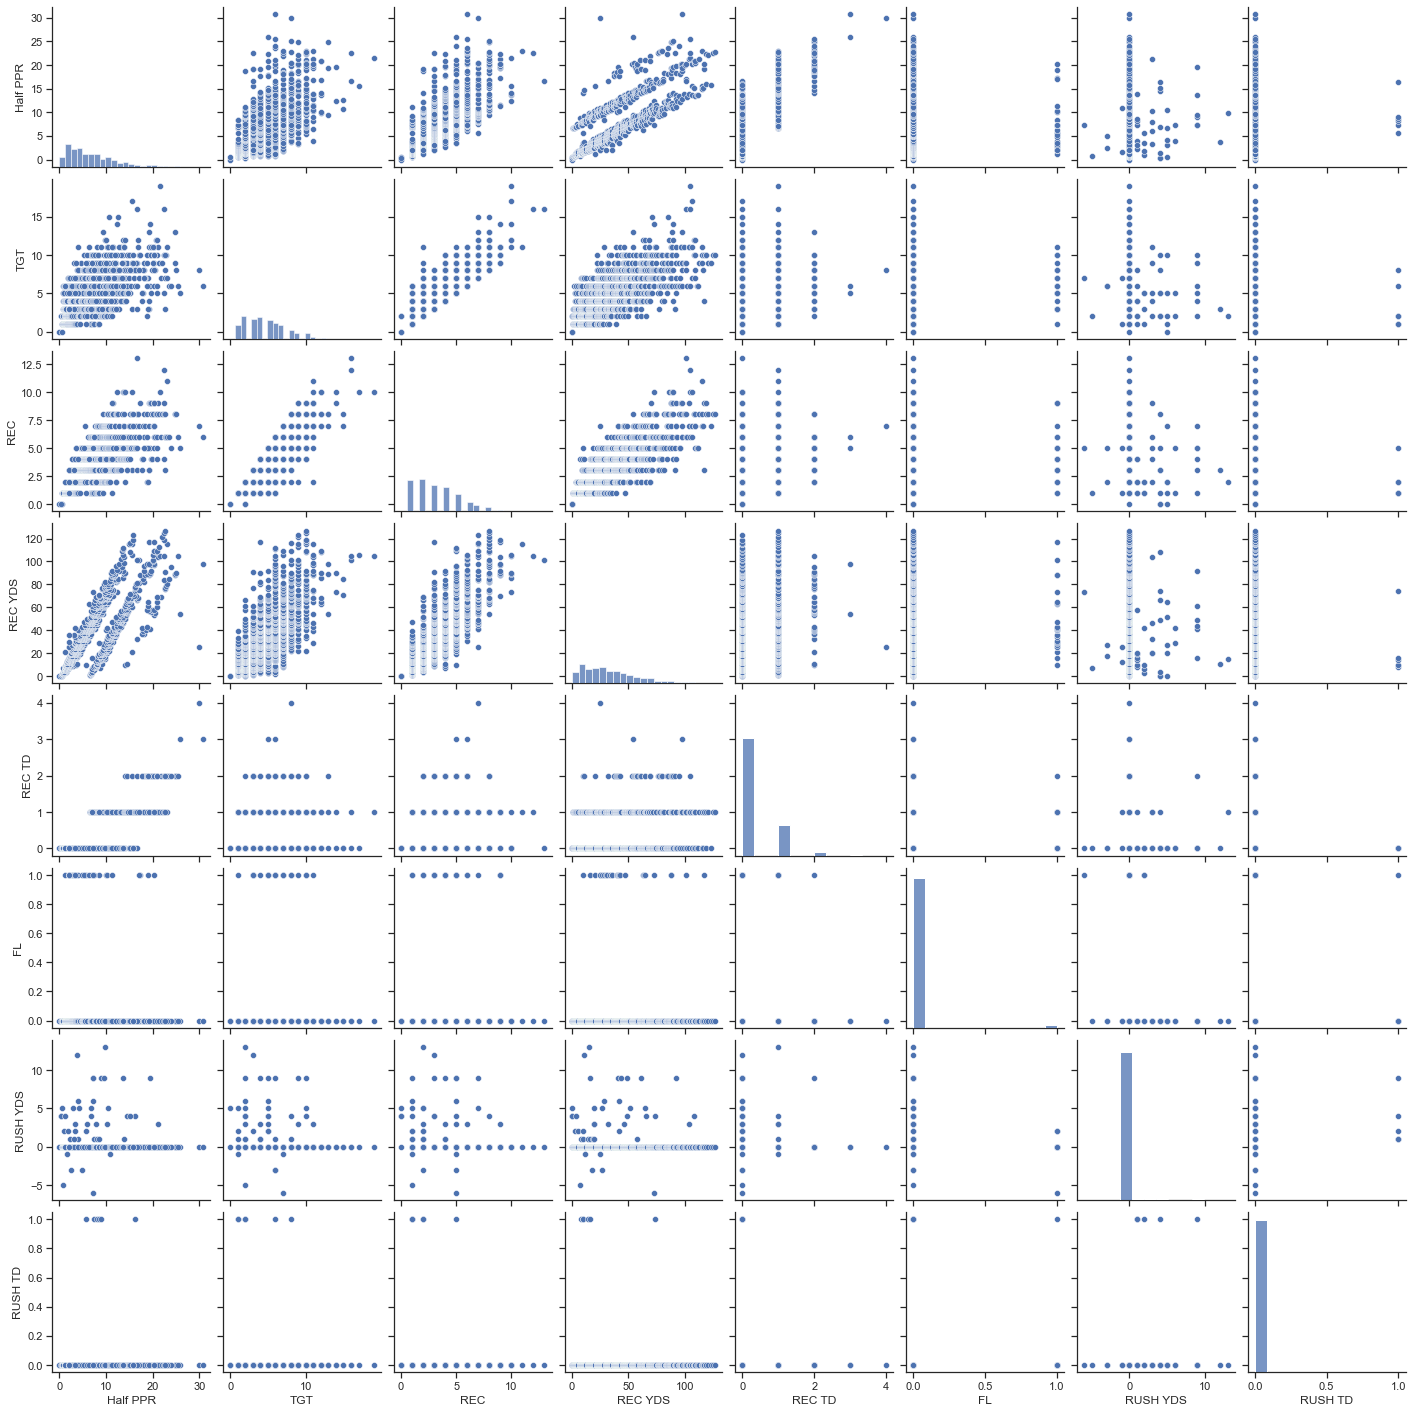

In [56]:
#Create pair plot
g = sns.pairplot(sub_te)
plt.savefig("TE Pair Plot.png")

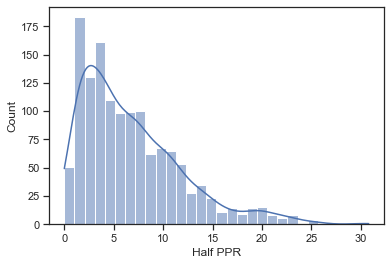

In [57]:
#Create histogram to visualize distribution of fantasy points
sns.histplot(sub_te['Half PPR'], bins = 30, kde = True)
plt.savefig("TE Fantasy Points Histogram.png")

In [58]:
#Create tight end fantasy scoring categories
df_te.loc[df_te['Half PPR'] < 6, 'TE Points Category'] = 'TE Poor'
df_te.loc[(df_te['Half PPR'] >= 6) & (df_te['Half PPR'] < 10), 'TE Points Category'] = 'TE Average'
df_te.loc[df_te['Half PPR'] > 10, 'TE Points Category'] = 'TE Good'
df_te['TE Points Category'].value_counts(dropna = False)

TE Poor       709
TE Average    328
TE Good       311
NaN            10
Name: TE Points Category, dtype: int64

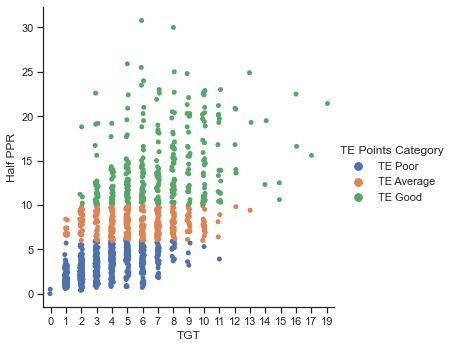

In [59]:
#Create categorical plot using scoring categories created above
sns.set(style="ticks")
g = sns.catplot(x="TGT", y="Half PPR", hue="TE Points Category", data=df_te)
plt.savefig("TE TGT Categorical Plot.png")

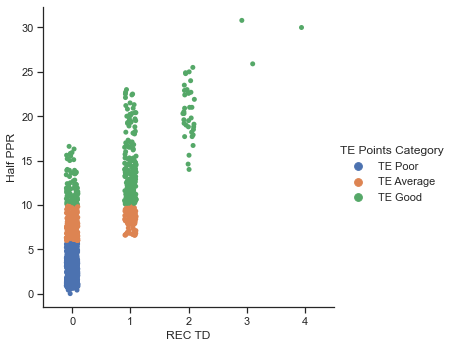

In [60]:
#Create categorical plot using scoring categories created above
sns.set(style="ticks")
g = sns.catplot(x="REC TD", y="Half PPR", hue="TE Points Category", data=df_te)
plt.savefig("TE TD Categorical Plot.png")

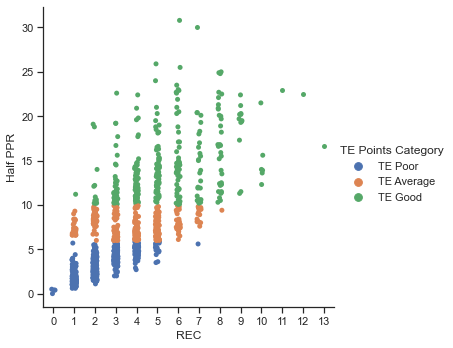

In [61]:
#Create categorical plot using scoring categories created above
sns.set(style="ticks")
g = sns.catplot(x="REC", y="Half PPR", hue="TE Points Category", data=df_te)
plt.savefig("TE REC Categorical Plot.png")

#### Questions to explore

In [62]:
#QB score spread resembles a normal bell curve whereas RB, WR, and TE is very right-skewed. This is likely due to NFL teams only playing one QB at a time while utilizing a committee approach for skill positions (RB, WR, and TE).
#Question to add: Which stat(s) best predict fantasy scores?

#### Define hypothesis

In [63]:
#TDs will be the best predictor of fantasy scores